In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM stellar''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Stellar,XLM,2014-08-06 23:59:59,0.003402,0.002266,0.002373,0.002657,35819.800781,9.663695e+05
1,2,Stellar,XLM,2014-08-07 23:59:59,0.003042,0.002455,0.002686,0.002501,142864.000000,1.079148e+06
2,3,Stellar,XLM,2014-08-08 23:59:59,0.003243,0.002493,0.002493,0.002881,93707.796875,1.260109e+06
3,4,Stellar,XLM,2014-08-09 23:59:59,0.003710,0.002873,0.002884,0.003481,233579.000000,1.645185e+06
4,5,Stellar,XLM,2014-08-10 23:59:59,0.007620,0.003363,0.003497,0.004303,352737.000000,2.216012e+06


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2527 non-null   object 
 1   Symbol      2527 non-null   object 
 2   Date        2527 non-null   object 
 3   High        2527 non-null   float64
 4   Low         2527 non-null   float64
 5   Open        2527 non-null   float64
 6   Close       2527 non-null   float64
 7   Volume      2527 non-null   float64
 8   Marketcap   2527 non-null   float64
 9   Range       2527 non-null   float64
 10  Difference  2527 non-null   float64
dtypes: float64(8), object(3)
memory usage: 217.3+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2527 non-null   object        
 1   Symbol      2527 non-null   object        
 2   Date        2527 non-null   datetime64[ns]
 3   High        2527 non-null   float64       
 4   Low         2527 non-null   float64       
 5   Open        2527 non-null   float64       
 6   Close       2527 non-null   float64       
 7   Volume      2527 non-null   float64       
 8   Marketcap   2527 non-null   float64       
 9   Range       2527 non-null   float64       
 10  Difference  2527 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 217.3+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2527.000000,2527.000000,2527.000000,2527.000000,2.527000e+03,2.527000e+03,2527.000000,2527.000000
mean,0.106980,0.095780,0.101413,0.101509,2.515161e+08,2.019410e+09,0.011200,0.000096
std,0.150700,0.131285,0.141105,0.141125,6.308333e+08,2.953213e+09,0.026761,0.015701
min,0.001509,0.001227,0.001352,0.001357,4.910920e+02,9.663695e+05,0.000023,-0.196441
25%,0.002555,0.002325,0.002441,0.002449,4.723715e+04,1.277635e+07,0.000198,-0.000833
50%,0.052033,0.047695,0.049505,0.049441,4.279170e+07,9.792163e+08,0.002621,-0.000008
75%,0.128354,0.119867,0.124293,0.124355,2.338594e+08,2.404003e+09,0.009768,0.000750
max,0.938144,0.677496,0.892399,0.896227,1.040858e+10,1.685469e+10,0.478692,0.333507


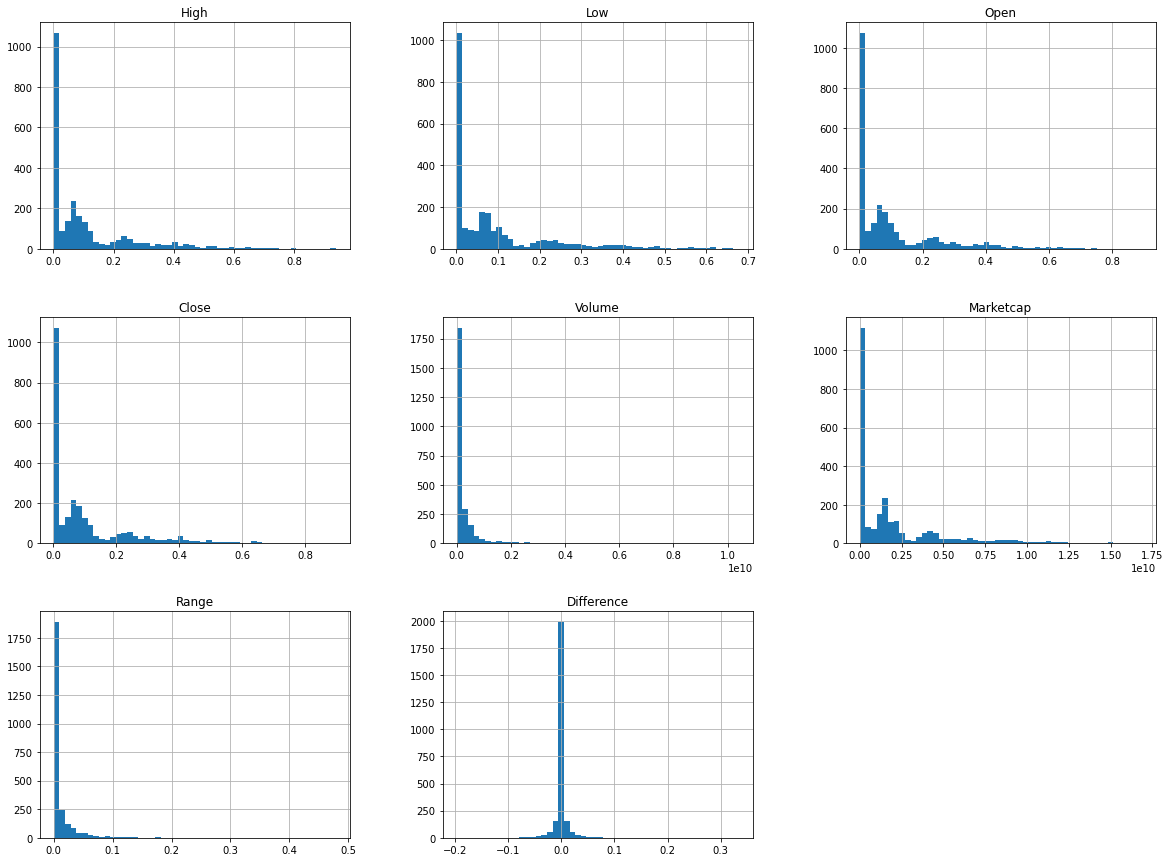

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,2478,1247,1259,2471,1273,1275,2393,1248,2480,1264
Date,2021-05-19 23:59:59,2018-01-04 23:59:59,2018-01-16 23:59:59,2021-05-12 23:59:59,2018-01-30 23:59:59,2018-02-01 23:59:59,2021-02-23 23:59:59,2018-01-05 23:59:59,2021-05-21 23:59:59,2018-01-21 23:59:59
Difference,-0.196441,-0.168349,-0.15892,-0.144418,-0.101183,-0.084379,-0.080012,-0.076745,-0.076482,-0.07023


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1246,2345,1244,1255,2464,1241,2434,1267,2382,2439
Date,2018-01-03 23:59:59,2021-01-06 23:59:59,2018-01-01 23:59:59,2018-01-12 23:59:59,2021-05-05 23:59:59,2017-12-29 23:59:59,2021-04-05 23:59:59,2018-01-24 23:59:59,2021-02-12 23:59:59,2021-04-10 23:59:59
Difference,0.333507,0.146122,0.119586,0.119096,0.101482,0.099163,0.098539,0.080497,0.074943,0.074894


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

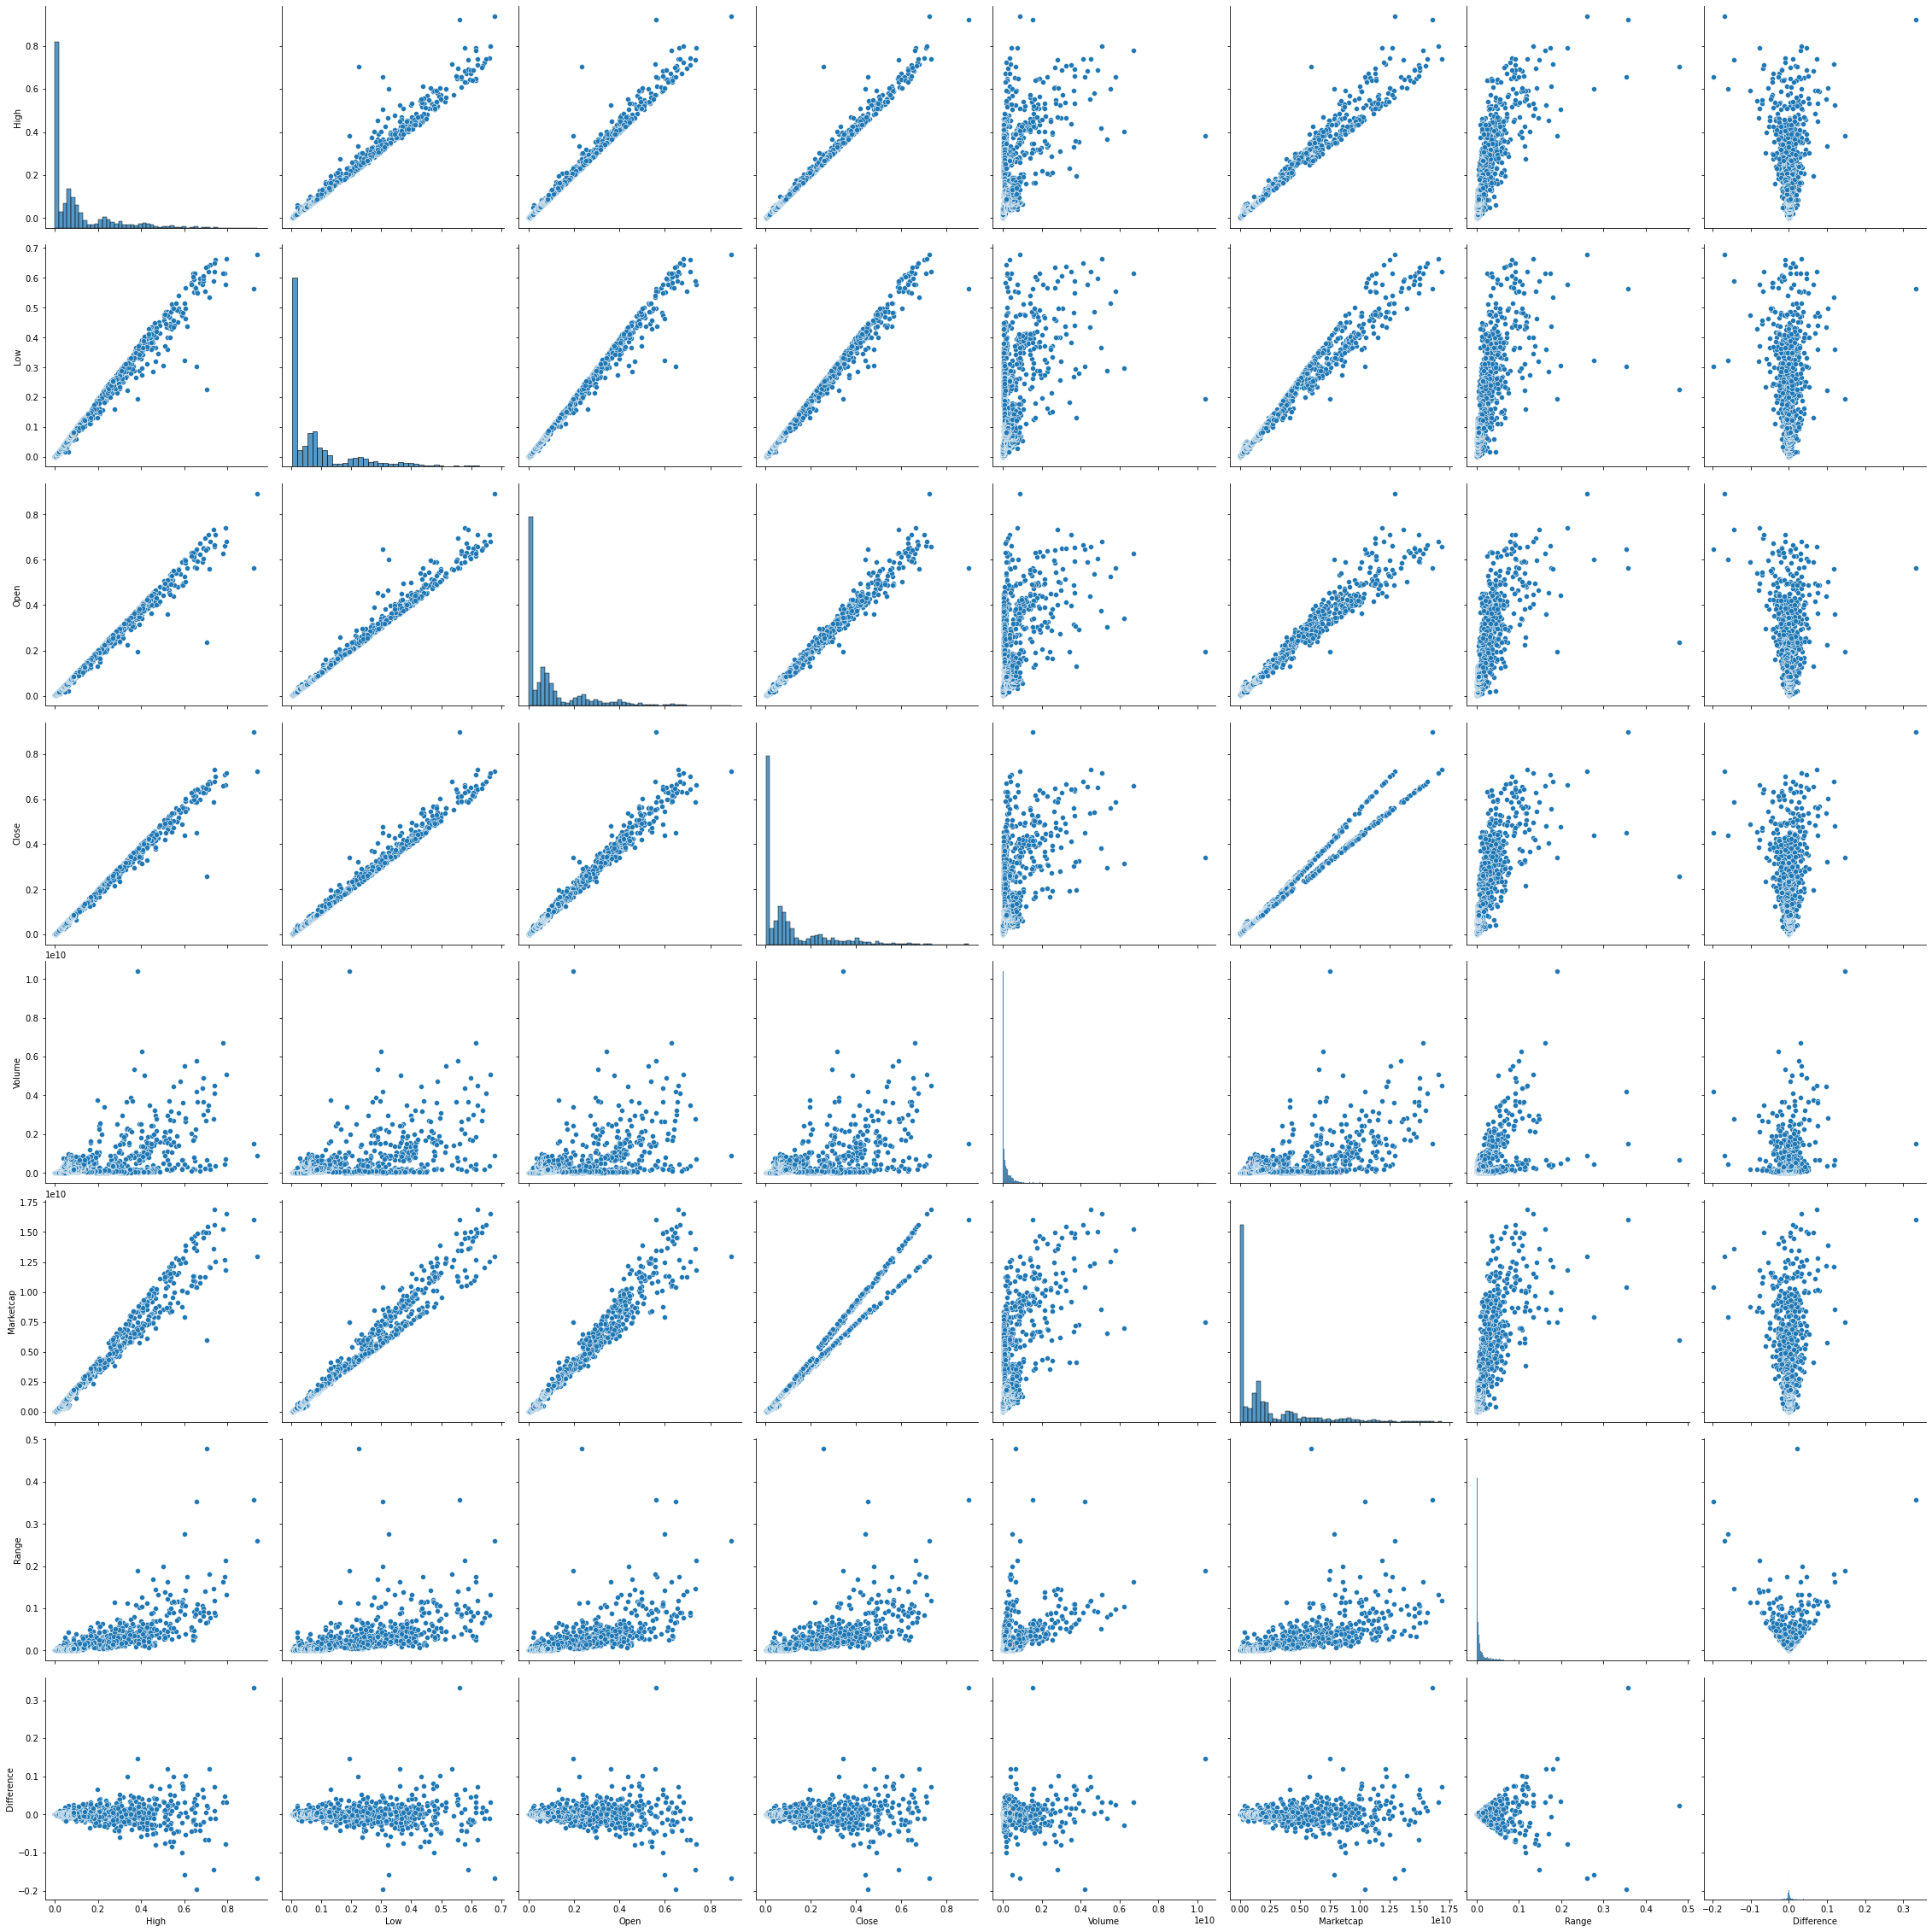

In [15]:
sns.pairplot(data,height=4);
